In [1]:
import os 
import pandas as pd 
import numpy as np


class FolderReader:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.dataframes = []

    def read_dataframes(self):
        for archivo in os.listdir(self.folder_path):
            if archivo.endswith('.csv'):
                ruta_archivo = os.path.join(self.folder_path, archivo)
                df = pd.read_csv(ruta_archivo)
                self.dataframes.append(df)

    def get_dataframe(self, index):
        if 0 <= index < len(self.dataframes):
            return self.dataframes[index]
        else:
            return None

    def get_dataframe_names(self):
        return [df.columns.tolist() for df in self.dataframes]

carpeta = '../Data' 

folder_reader = FolderReader(carpeta)
folder_reader.read_dataframes()

df = pd.concat(folder_reader.dataframes)

eeg_names = ['EMG_CHANNEL_' + str(i+1) for i in range(0,8)]
targets = ["THUMBFLEX1","THUMBFLEX2","INDEXFLEX1","INDEXFLEX2","INDEXFLEX3","MIDDLEFLEX1","MIDDLEFLEX2","MIDDLEFLEX3","RINGFLEX1","RINGFLEX2","RINGFLEX3",
           "LITTLEFLEX1","LITTLEFLEX2","LITTLEFLEX3"]

total_cols = eeg_names + targets

df_eeg_channels = df[total_cols]
df_eeg_channels

,EMG_CHANNEL_1,EMG_CHANNEL_2,EMG_CHANNEL_3,EMG_CHANNEL_4,EMG_CHANNEL_5,EMG_CHANNEL_6,EMG_CHANNEL_7,EMG_CHANNEL_8,THUMBFLEX1,THUMBFLEX2,...,INDEXFLEX3,MIDDLEFLEX1,MIDDLEFLEX2,MIDDLEFLEX3,RINGFLEX1,RINGFLEX2,RINGFLEX3,LITTLEFLEX1,LITTLEFLEX2,LITTLEFLEX3
0,1.00000,-7.00000,-1.00000,3.0000,0.00000,-1.00000,0.00000,-2.00000,17.025000,17.025000,...,10.058000,13.840000,23.412400,19.706200,11.880000,19.755900,17.878000,13.100000,24.407100,12.203600
1,-0.56250,-0.75000,11.50000,-0.1250,-0.78125,-0.21875,-0.78125,-0.43750,17.025000,17.025000,...,10.058000,13.840000,23.412626,19.706313,11.880629,19.756719,17.878409,13.100629,24.407237,12.203668
2,-0.43750,-0.12500,6.00000,-1.0000,-1.00000,0.56250,0.68750,-1.12500,17.025000,17.025000,...,10.058000,13.840000,23.412851,19.706426,11.881258,19.757539,17.878818,13.101258,24.407375,12.203737
3,0.34375,-1.34375,4.15625,-0.3125,-0.65625,0.31250,0.96875,-1.65625,17.025000,17.025000,...,10.058000,13.840000,23.413077,19.706540,11.881887,19.758358,17.879226,13.101887,24.407512,12.203805
4,0.62500,-1.75000,10.62500,0.5000,-0.12500,-0.87500,-0.87500,-0.87500,17.025000,17.025000,...,10.058000,13.840000,23.413302,19.706653,11.882516,19.759177,17.879635,13.102516,24.407650,12.203873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81899,-3.00000,-2.00000,5.00000,14.0000,-3.00000,-3.00000,-1.00000,0.00000,14.445281,14.445281,...,12.164114,9.620203,24.324882,20.162391,2.130121,13.066502,14.533210,14.443207,24.307996,12.154038
81900,-3.00000,-2.00000,5.00000,14.0000,-3.00000,-3.00000,-1.00000,0.00000,14.443125,14.443125,...,12.164489,9.637812,24.325788,20.162844,2.047734,12.957959,14.478938,14.442578,24.309705,12.154894
81901,-3.00000,-2.00000,5.00000,14.0000,-3.00000,-3.00000,-1.00000,0.00000,14.440969,14.440969,...,12.164865,9.655422,24.326693,20.163297,1.965348,12.849416,14.424666,14.441949,24.311415,12.155749
81902,-3.00000,-2.00000,5.00000,14.0000,-3.00000,-3.00000,-1.00000,0.00000,14.438813,14.438813,...,12.165240,9.673031,24.327599,20.163749,1.882961,12.740873,14.370394,14.441320,24.313125,12.156604


In [2]:
from scipy.signal import butter, filtfilt

def butter_highpass(cutoff, fs, order=7):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def highpass_filter(data, cutoff, fs, order=7):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

cutoff = 10
fs = 256 

for col in eeg_names:
    df_eeg_channels[col] = highpass_filter(df_eeg_channels[col], cutoff, fs, 7)

/var/folders/8l/1n8nw8712ssfv4m1tjmf5ykd2c6n2q/T/ipykernel_1630/2108408901.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eeg_channels[col] = highpass_filter(df_eeg_channels[col], cutoff, fs, 7)


In [4]:
df_eeg_channels.shape[0]/fs

1358.4375

In [5]:
from scipy.signal import iirnotch, lfilter


signal = df_eeg_channels['EEG_CHANNEL_2'].values
fs = 1000  
f0 = 60.0  
Q = 30.0  

b, a = iirnotch(f0, Q, fs)


signal_filtered = lfilter(b, a, signal)

KeyError: 'EEG_CHANNEL_2'

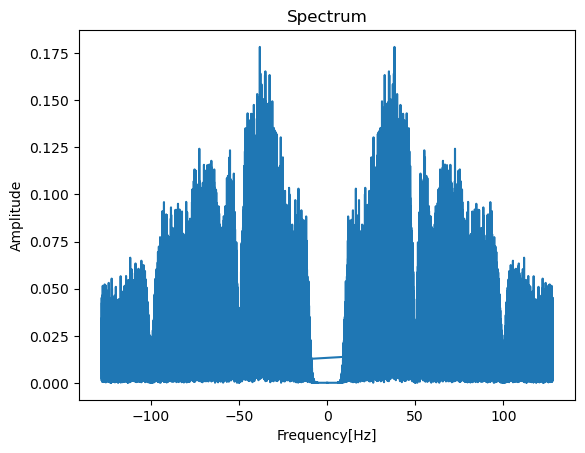

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, rfft
from scipy.fft import fftfreq, rfftfreq

signal = df_eeg_channels['EMG_CHANNEL_2'].values

duracion = round(df_eeg_channels.shape[0]/fs)
N = len(signal)
normalize = N/2

fourier = fft(signal)
norm_amplitude = np.abs(fourier)/normalize
frequency_axis = fftfreq(N, d=1.0/fs)

plt.plot(frequency_axis, norm_amplitude)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.title('Spectrum')
plt.show()

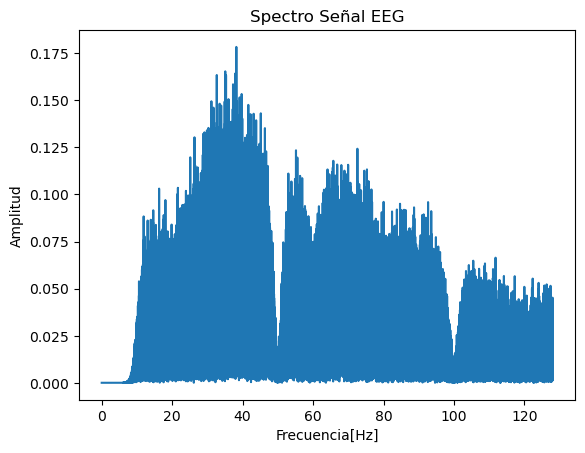

In [7]:

plt.plot(rfftfreq(N, d=1/fs), 2*np.abs(rfft(signal))/N)
plt.title('Spectro Señal EEG')
plt.xlabel('Frecuencia[Hz]')
plt.ylabel('Amplitud')
plt.show()

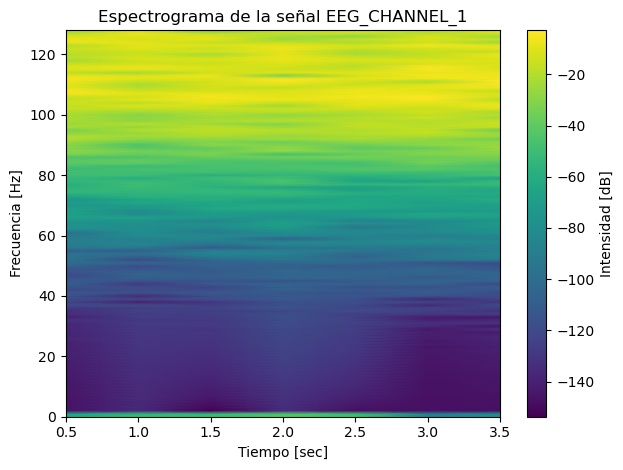

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram, welch
import biosppy.signals.emg as bse

# Supongamos que 'filtered' es tu señal
fs_emg = 256  # frecuencia de muestreo
nperseg = 256  # longitud de cada segmento
noverlap = 128  # número de puntos de superposición entre segmentos

fs_emg = 256
seconds = 4
window_size = (seconds*fs_emg)  # en milisegundos

df_eeg_channels = df_eeg_channels.reset_index(drop=True)

window = df_eeg_channels.iloc[0:0+window_size]

ts, filtered, _ = bse.emg(signal=window['EMG_CHANNEL_2'].values, sampling_rate=256, show=False)

frequencies, times, Sxx = spectrogram(filtered, fs=fs_emg, nperseg=nperseg, noverlap=noverlap, window='hann', scaling='spectrum')

plt.figure()
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.colorbar(label='Intensidad [dB]')
plt.ylabel('Frecuencia [Hz]')
plt.xlabel('Tiempo [sec]')
plt.title('Espectrograma de la señal EEG_CHANNEL_1')
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from scipy.signal import stft

signals = df_eeg_channels[eeg_names].values
_, _, spectrograms = stft(signals)

# Normalizar las características
spectrograms = (spectrograms - np.mean(spectrograms)) / np.std(spectrograms)

# Dividir el dataset
X_train, X_test, y_train, y_test = train_test_split(spectrograms, df_eeg_channels[targets].values, test_size=0.2)

/Users/nikrodriguez/anaconda3/envs/master/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 8, using nperseg = 8
  warnings.warn('nperseg = {0:d} is greater than input length '


In [35]:
print("X train shape: ", X_train.shape)
print("X test shape: ", X_test.shape)
print("y train shape: ", y_train.shape)
print("y test shape: ", y_test.shape)

X train shape:  (278208, 5, 3)
X test shape:  (69552, 5, 3)
y train shape:  (278208, 14)
y test shape:  (69552, 14)


In [52]:
from keras.models import Sequential
from keras.layers import Conv1D, LSTM, Dense, Flatten

X_train, X_test, y_train, y_test = train_test_split(spectrograms, df_eeg_channels[targets].values, test_size=0.3)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=X_train.shape[1:]))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(14))

model.compile(optimizer='adam', loss='mae')

In [54]:
import keras

X_train, X_test, y_train, y_test = train_test_split(spectrograms, df_eeg_channels[targets].values, test_size=0.3)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1])


model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=X_train.shape[1:]))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(14))


optimizer = keras.optimizers.RMSprop(0.001)

model.compile(loss='mae',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

In [55]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
7608/7608 [==============================] - 20s 2ms/step - loss: 4.5441 - mae: 4.5441 - mse: 90.0513 - val_loss: 4.4529 - val_mae: 4.4529 - val_mse: 86.5302
Epoch 2/100
7608/7608 [==============================] - 18s 2ms/step - loss: 4.4684 - mae: 4.4684 - mse: 88.3302 - val_loss: 4.6070 - val_mae: 4.6070 - val_mse: 86.9795
Epoch 3/100
7608/7608 [==============================] - 17s 2ms/step - loss: 4.4602 - mae: 4.4602 - mse: 88.2619 - val_loss: 4.4244 - val_mae: 4.4244 - val_mse: 87.3621
Epoch 4/100
7608/7608 [==============================] - 19s 2ms/step - loss: 4.4550 - mae: 4.4550 - mse: 88.2520 - val_loss: 4.4215 - val_mae: 4.4215 - val_mse: 86.7439
Epoch 5/100
7608/7608 [==============================] - 18s 2ms/step - loss: 4.4521 - mae: 4.4521 - mse: 88.2375 - val_loss: 4.4169 - val_mae: 4.4169 - val_mse: 87.3643
Epoch 6/100
7608/7608 [==============================] - 18s 2ms/step - loss: 4.4504 - mae: 4.4504 - mse: 88.2277 - val_loss: 4.4339 - val_mae: 4.4339

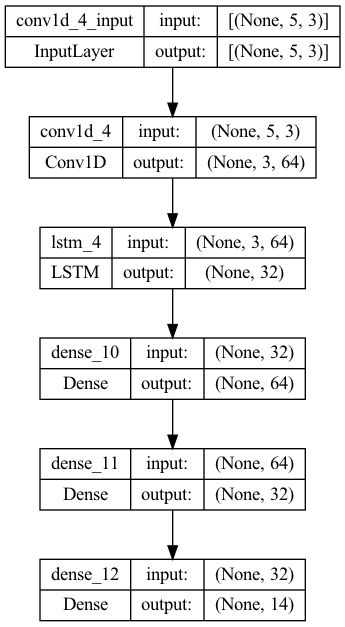

In [50]:
from keras.utils import plot_model
from IPython.display import Image

# Generar el diagrama del modelo
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

# Mostrar el diagrama
Image('model.png')

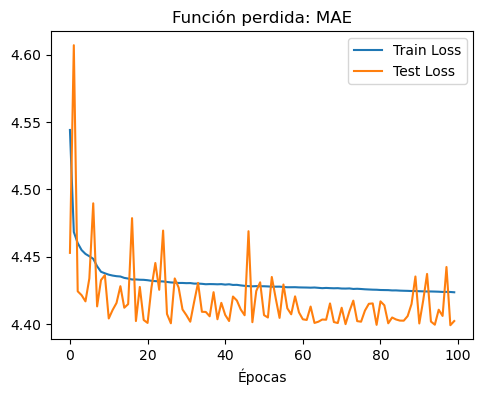

In [94]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Función perdida: MAE')
plt.xlabel('Épocas')
plt.legend()


plt.show()

In [95]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
y_test = y_test.reshape(y_test.shape[0], y_test.shape[1])


loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f}".format(mae))
print("Testing set Mean Sq Error: {:5.2f}".format(mse))

3261/3261 - 3s - loss: 4.4023 - mae: 4.4023 - mse: 87.3305 - 3s/epoch - 1ms/step
Testing set Mean Abs Error:  4.40
Testing set Mean Sq Error: 87.33


In [96]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)

for i in range(14):
    mae = mean_absolute_error(y_test[:, i], predictions[:, i])
    print(f"MAE for output {i+1}: {mae}")

3261/3261 [==============================] - 3s 827us/step
MAE for output 1: 0.8817970825875705
MAE for output 2: 0.8814289414657608
MAE for output 3: 8.357432766931515
MAE for output 4: 7.705352762113963
MAE for output 5: 3.85413699115407
MAE for output 6: 5.7846546960591105
MAE for output 7: 4.180843817098742
MAE for output 8: 2.678770637471581
MAE for output 9: 4.315146315865479
MAE for output 10: 9.937135970845803
MAE for output 11: 3.1514015144076932
MAE for output 12: 4.392257861043784
MAE for output 13: 3.6748570352928196
MAE for output 14: 1.837348003746158


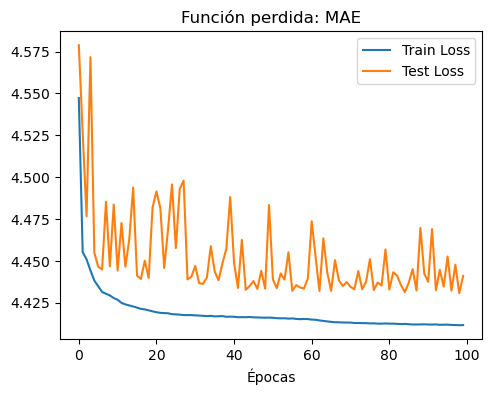

In [53]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Función perdida: MAE')
plt.xlabel('Épocas')
plt.legend()


plt.show()

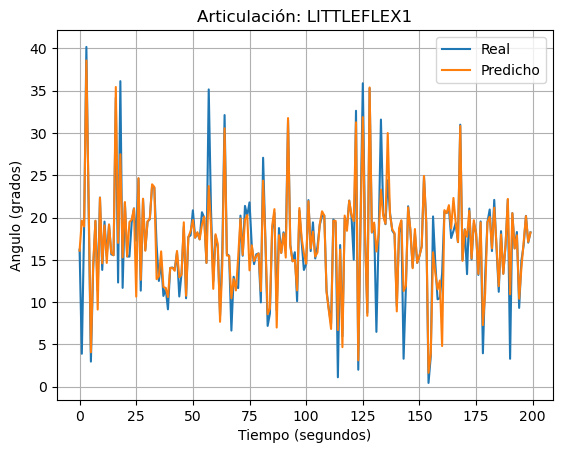

In [47]:
articulacion = 'LITTLEFLEX1'

plt.plot(y_test[[articulacion]].iloc[2000:2200].reset_index(drop=True), label='Real')
plt.plot(df_test[[articulacion]].iloc[2000:2200].reset_index(drop=True), label='Predicho') 

plt.xlabel('Tiempo (segundos)')
plt.ylabel('Angulo (grados)')
plt.legend(loc='upper right')
plt.title('Articulación: ' + articulacion)
plt.grid(True)
plt.show()


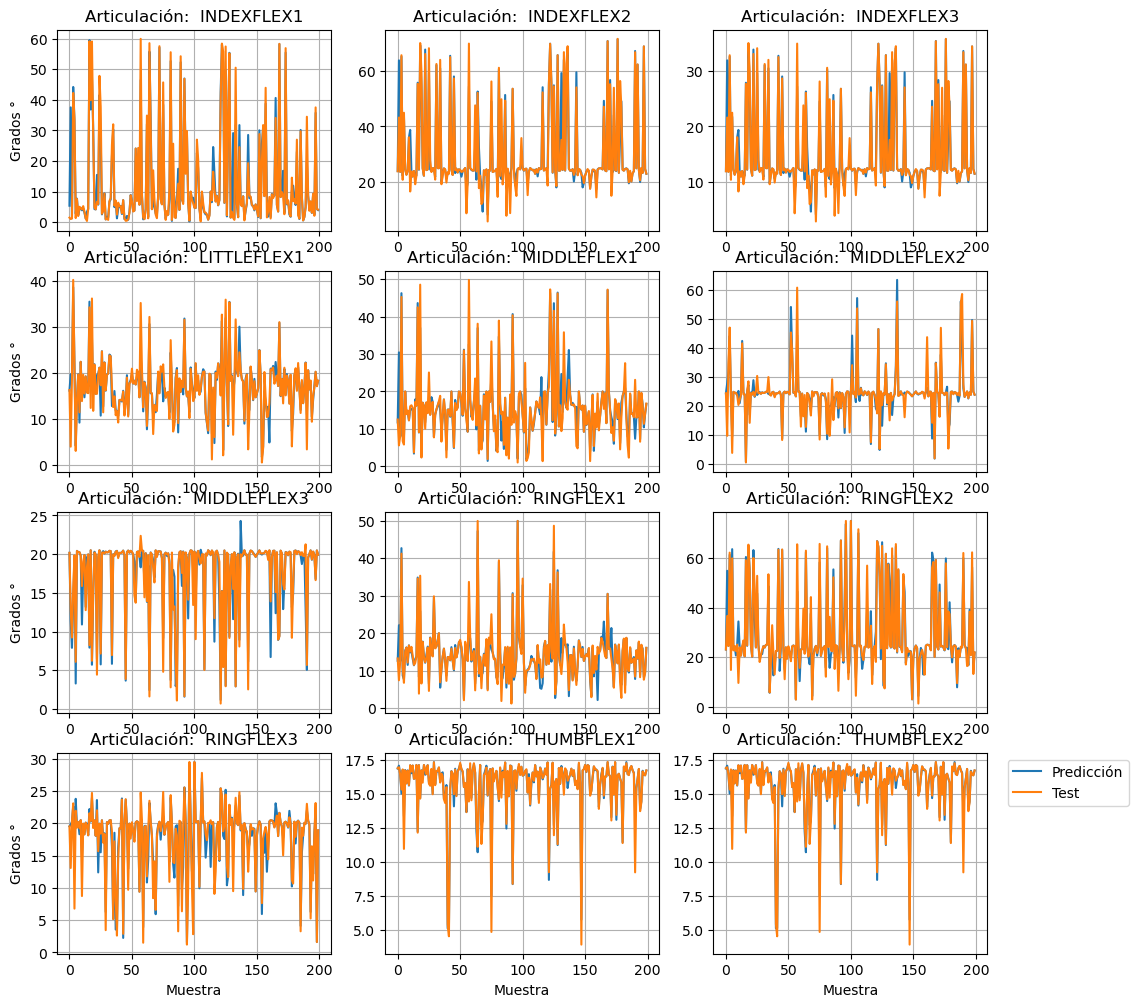

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 3, figsize=(12, 12))

for i in range(4):
    for j in range(3):

        articulacion = targets_sorted[i*3 + j]

        ax = axs[i, j]

        ax.plot(df_test[[articulacion]].iloc[2000:2200].reset_index(drop=True), label='Predicción') 
        ax.plot(y_test[[articulacion]].iloc[2000:2200].reset_index(drop=True), label='Test')

        if j == 0:
            ax.set_ylabel('Grados °')
        if i == 3:
            ax.set_xlabel('Muestra')
        
        ax.set_title(f'Articulación:  {articulacion}')
        ax.grid(True)

plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()

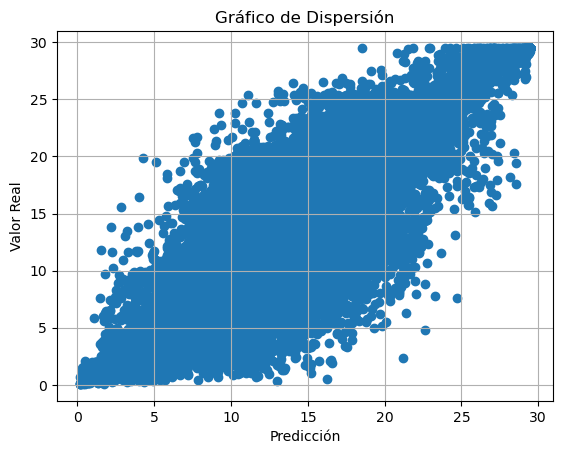

In [122]:
plt.scatter(df_test[['RINGFLEX3']].reset_index(drop=True), y_test[['RINGFLEX3']].reset_index(drop=True)) 

plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Gráfico de Dispersión')
plt.grid(True)
plt.show()

